In [1]:
#configuraciones
library(repr)
options(repr.plot.width=15,repr.plot.height=7)
IRdisplay::display_html("<style>.container { width:95% !important; }</style>")
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

<div style="text-align:left">
    <img style='height:100px' src='https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png' align='left'>
<div>

<div style='float:right;'>
    <div style="text-align:center">
        UNIVERSIDAD TÉCNICA FEDERICO SANTA MARÍA <br>
        CAMPUS SANTIAGO <br>
        DEPARTAMENTO DE INFORMÁTICA <br>
        PRIMER SEMESTRE 2020
    </div>
</div>

<div style="padding:50px;"></div>
<hr style="height:2px;border:none"/>

# Ayudantía Regresión Lineal (en R)

<hr style="height:2px;border:none"/>
    
* _**Profesor - Nicolás Rojas**_
* _**Francisca Ramírez - francisca.ramirez.12@sansano.usm.cl**_
* _**Felipe Vega - felipe.vega.14@sansano.usm.cl**_
    
<hr style="height:2px;border:none"/>

## Antes de comenzar

Es necesario instalar algunos paquetes adicionales para ejecutar los test de Durbin Watson (independencia de errores) y Kolmogorov-Smirnov (distribución normal de residuales).

In [ ]:
install.packages('ggplot2') # Graficos
install.packages('lmtest') #Librería Durbin Watson
install.packages('fBasics') #Librería Kolmogorov-Smirnov
install.packages('chemCal') #Calcular X a partir de Y

Cargamos las librerías que utilizaremos durante el desarrollo de esta ayudantía.

In [3]:
library(ggplot2)
library(lmtest)
library(fBasics)
library(chemCal)

## Ejercicio

#### Víctor Zavala, el denominado "Rey de los Churros" se encuentra planificando el año 2021 luego de dar por perdida la producción del año 2020. Como sus resultados no han sido muy buenos, Víctor Zavala debe pensar muy bien cuanto personal contratar para producir la cantidad de churros necesaria para cumplir con las metas que le planteó la junta directiva de "Churroware", sus principales accionistas.

#### Aproblemado por la situación, el Rey de los Churros decide asesorarse con los alumnos de Investigación de Operaciones para encontrar la solución, esto dado que es muy tacaño para contratar un estudio profesional. Para esto, les traspasa los datos de mensuales de producción de los años 2018 y 2019.

Los datos proporcionados corresponden a cantidad de toneladas de churros producidas en 1 mes y la cantidad de horas hombre invertidas para llegar a dicho nivel de producción. Estos se encuentran en el archivo `data.csv`.

- Plantee un modelo líneal para la situación anterior.
- ¿Cuántas HH son necesarias para producir 13 toneladas de churros?
- ¿Cuántas toneladas de churros se pueden producir en 35 HH?, ¿Y en 70?
- Evalúe el grado/calidad de la relación entre las variables.
- Considerando la siguiente afirmación: "La cantidad de HH crece al triple respecto de las toneladas de churros".
        - Verifique mediente un Intervalo de Confianza adecuado, considerando una certeza de 95%.
        - Verifique mediante Dócimas de Hipótesis.
- Construya un intervalo de confianza para la respuesta de HH dado 15 toneladas de churros.
- Verifique si el modelo es lineal.
- Verifique si los errores son independientes.
- Verifique si los errores siguen una distribución normal.

## Datos

Para comenzar, cargamos y visualizamos parte de los datos los datos a utilizar.

In [4]:
data = read.csv("data.csv",sep=';')
head(data)

,HH,TonChurros
,<int>,<int>
1,30,14
2,10,5
3,43,18
4,31,16
5,27,11
6,18,6


## Desarrollo

#### Plantee un modelo lineal para la situación anterior.

El modelo simple$^{(1)}$ de regresión lineal se formula de la siguiente manera:

$$X = \begin{bmatrix}
        x_{1} \\
        x_{2} \\
        \vdots \\
        x_{n}
    \end{bmatrix}
    \hspace{2cm}
 Y = \begin{bmatrix}
            y_{1} \\
            y_{2} \\
            \vdots \\
            x_{n}
        \end{bmatrix} $$

$$ Y = \beta_1 \cdot X + \beta_0 + \epsilon_i $$


En este caso debemos definir cual de nuestras columnas corresponde a la variable dependiente y cual a la variable independiente. Del enunciado se desprende que se desea conocer la cantidad de personal que se contratará, lo cual está directamente relacionado con las HH, a partir de la producción de churros, por lo que la _**producción de churros**_ `TonChurros` será la variable independiente _**X**_ y las _**horas hombre**_ $^{(2)}$ serán la variable dependiente _**Y**_.

Para construir este modelo, debemos suponer que los errores siguen una distribución normal:

- Con valor esperado igual a 0
- Con varianza $\sigma^2$
- Con convarianza entre errores igual a 0, es decir, son independientes.

Existen distintos test para comprobar si se cumplen estos supuestos en el modelo.

En R, se puede ajustar un modelo de regresión lineal utilizando la función `lm`, la cual recibe una fórmula y los datos a utilizar. 



In [5]:
# La formula de lm se construye de la misma manera que para 
# los árboles de clasificación
model <- lm(HH ~ TonChurros,data=data)
model


Call:
lm(formula = HH ~ TonChurros, data = data)

Coefficients:
(Intercept)   TonChurros  
  -0.006648     2.175242  


Al construir el modelo lineal se obtiene que $\beta_1$ es $2.175242$ y $\beta_0$ es $-0.006648$. Por lo tanto, el modelo es el siguiente:

$$ \hat{Y} = 2.175242 \cdot X - 0.006648$$


Podemos graficar tanto los datos como el modelo de regresión obtenido, donde la región sombreada corresponde a los intervalos de confianza de la regresión $^{(3)}$.

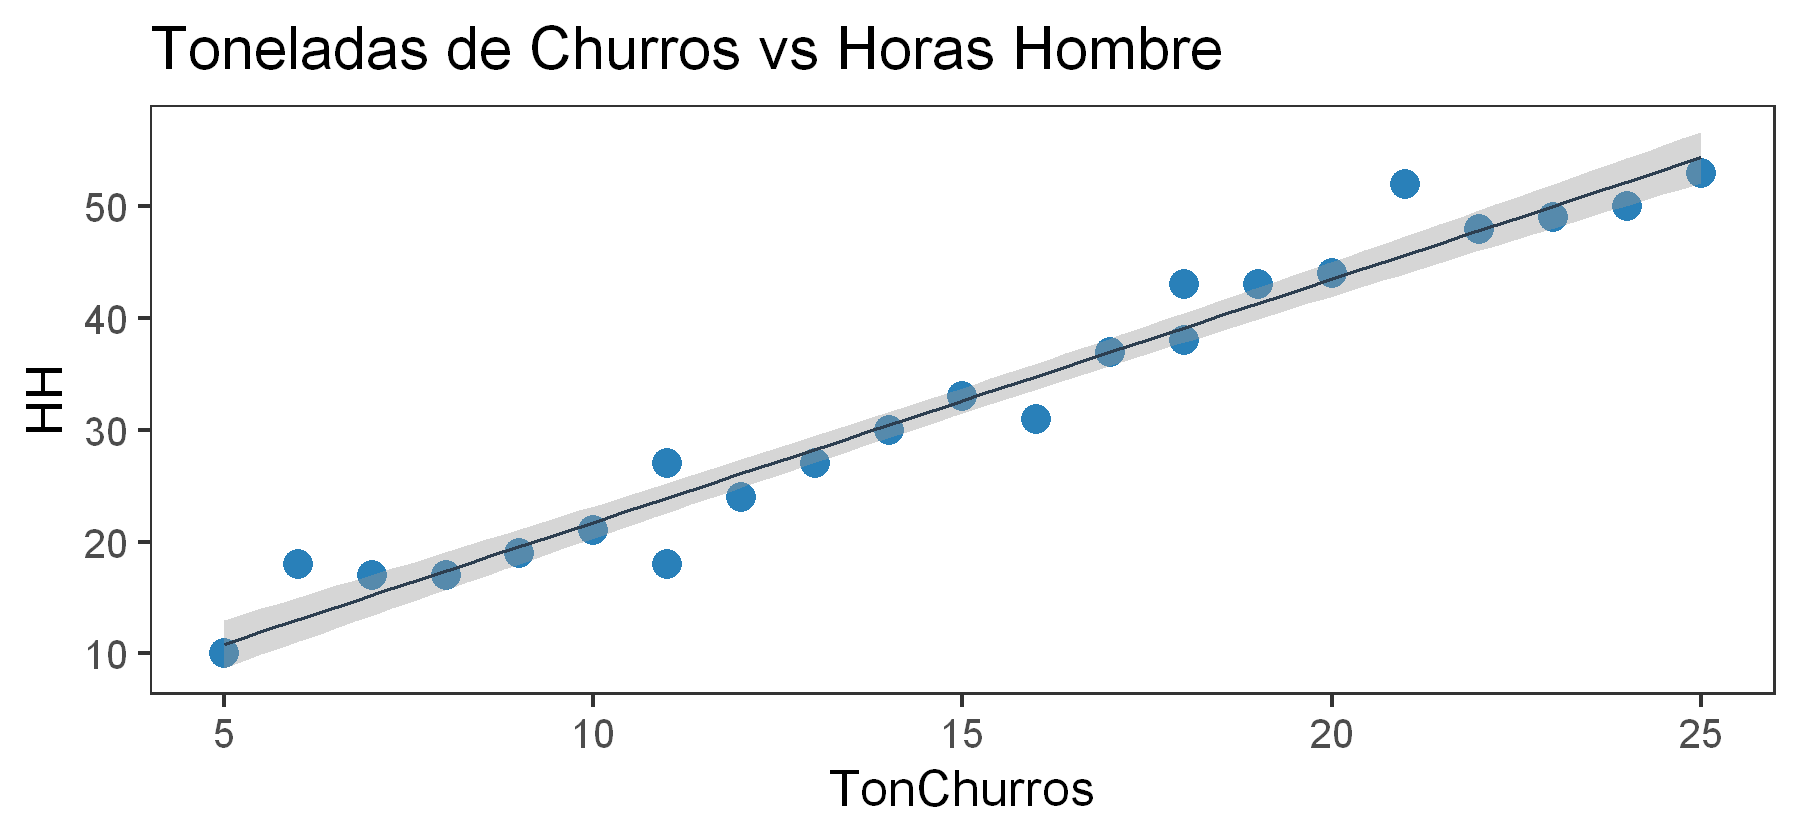

In [8]:
ggplot(data,aes(x=TonChurros,y=HH)) +
    geom_point(color='#2980B9',size=8) + #Gráfica de puntos
    geom_smooth(method=lm, formula= y~x, color='#2C3E50') +
    labs(title='Toneladas de Churros vs Horas Hombre') +
    theme_test(base_size=30)

Tambien se pueden ver más detalles sobre la regresión. Para esto, utilizamos la función `summary`. 

_**Nota:**_ Si quieren entender lo siguiente recomiendo ver las cápsulas de la materia antes.

In [103]:
model_summary <- summary(model)
model_summary


Call:
lm(formula = HH ~ TonChurros, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9210 -1.1787 -0.5086  0.7956  6.3266 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.006648   1.436815  -0.005    0.996    
TonChurros   2.175242   0.091138  23.867   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.719 on 22 degrees of freedom
Multiple R-squared:  0.9628,	Adjusted R-squared:  0.9611 
F-statistic: 569.7 on 1 and 22 DF,  p-value: < 2.2e-16


En la sección Residual se muestran los cuartiles de los residuos de la regresión. En Coefficients se muestra información sobre los coeficientes: `Estimate` corresponde al valor del coeficiente; `Std. Error` corresponde a la desviación estándar de ambos coeficientes $^{(4)}$; `t-value` corresponde al estadístico utilizado para docimar un coeficiente nulo $^{(5)}$. `Residual standard error` corresponde a la desviación estándar de los residuos $^{(6)}$; `Multuple R-squared` corresponde al coeficiente de determinación; y finalmente `F-statistic` corresponde al estadístico utilizado en el Test de Anova.

_**(1)**_ Se considera simple porque utiliza una sola variable independiente. Se puede realizar una regresión lineal con más de una variable de este estilo.

_**(2)**_ Hay varias discusiones de cambiar términos utilizados por otros más inclusivos, por ejemplo, en Twitter están cambiando términos en su código/documentación [LINK](https://twitter.com/TwitterEng/status/1278733305190342656). Dejé el término HH ya que es más probable que dicho término lo hayan escuchado con ese nombre, pero es interesante ver los cambios que se podrían realizar.

_**(3)**_ Por defecto considera una certeza de $0.95$, lo que implica un nivel de significancia $\alpha = 0.05$.

_**(4)**_ $ \sqrt{V(\hat{\beta_{1}})} ; \sqrt{V(\hat{\beta_{0}})} $. Ver [formulario](https://aula.usm.cl/pluginfile.php/6961025/mod_resource/content/0/Form%2BTablas.pdf) para más detalles.

_**(5)**_ $t_{\beta_{1}} = \frac{\hat{\beta_{1}}-c}{\frac{S}{\sqrt[]{S_{xx}}}} ; t_{\beta_{0}} = \frac{\hat{\beta_{0}}-l}{s\cdot \sqrt{\frac{\sum_{i=1}^{n}x_{i}^{2}}{n\,S_{xx}}}}$ Con C e I igual a 0.

_**(6)**_ $\sqrt{\hat{\sigma^2}}$.


#### ¿Cuántas HH son necesarias para producir 13 toneladas de churros?

Antes de responder esta pregunta se debe observar el dominio de las variables utilizadas.

In [12]:
summary(data)

       HH          TonChurros   
 Min.   :10.00   Min.   : 5.00  
 1st Qu.:18.75   1st Qu.: 9.75  
 Median :30.50   Median :14.50  
 Mean   :31.62   Mean   :14.54  
 3rd Qu.:43.25   3rd Qu.:19.25  
 Max.   :53.00   Max.   :25.00  

Las toneladas de churros van entre 5 y 25, mientras que las HH van entre 10 y 53. Como las 13 toneladas de la pregunta se encuentran dentro del dominio de la regresión, podemos utilizar el modelo para encontrar las HH.

$$ \hat{y} = 2.175242 \cdot 13 - 0.006648$$

Para realizar la operación anterior utilizamos la función `predict`, la cual recibe como parámetros el modelo de regresión, un dataframe con uno o más valores para la variable independiente. El parámetro `type=response` sirve para que retorne el valor de la predicción.

In [15]:
predict(model,newdata=data.frame(TonChurros=13),type='response')

1 
28.2715

#### ¿Cuántas toneladas de churros se pueden producir en 35 HH?, ¿Y en 70?

Como 35 HH se encuentra dentro del dominio, podemos aplicar el modelo lineal.

$$ 35 = 2.175242 \cdot X - 0.006648$$

Utilizando la función `inverse.predict` se puede calcular este valor. Esta función entrega la predicción, el error y intervalos de confianza. Como en este caso interesa solo la predicción entregamos solo dicho valor.

In [17]:
inverse.predict(model,35)$Prediction

[1] 16.09322

Ahora, las 70 HH se escapan del dominio de la regresión, por lo que no se debe aplicar el modelo, ya que la varianza fuera del dominio es muy alta $^{(1)}$.

_**(1)**_ Uno no sabe como se comporta el fenómeno que se está estudiando fuera de los datos que se poseen. Perfectamente los datos se podrían distribuir de otra manera fuera del dominio utilizado. Por ejemplo, se podría dar la siguiente situación.

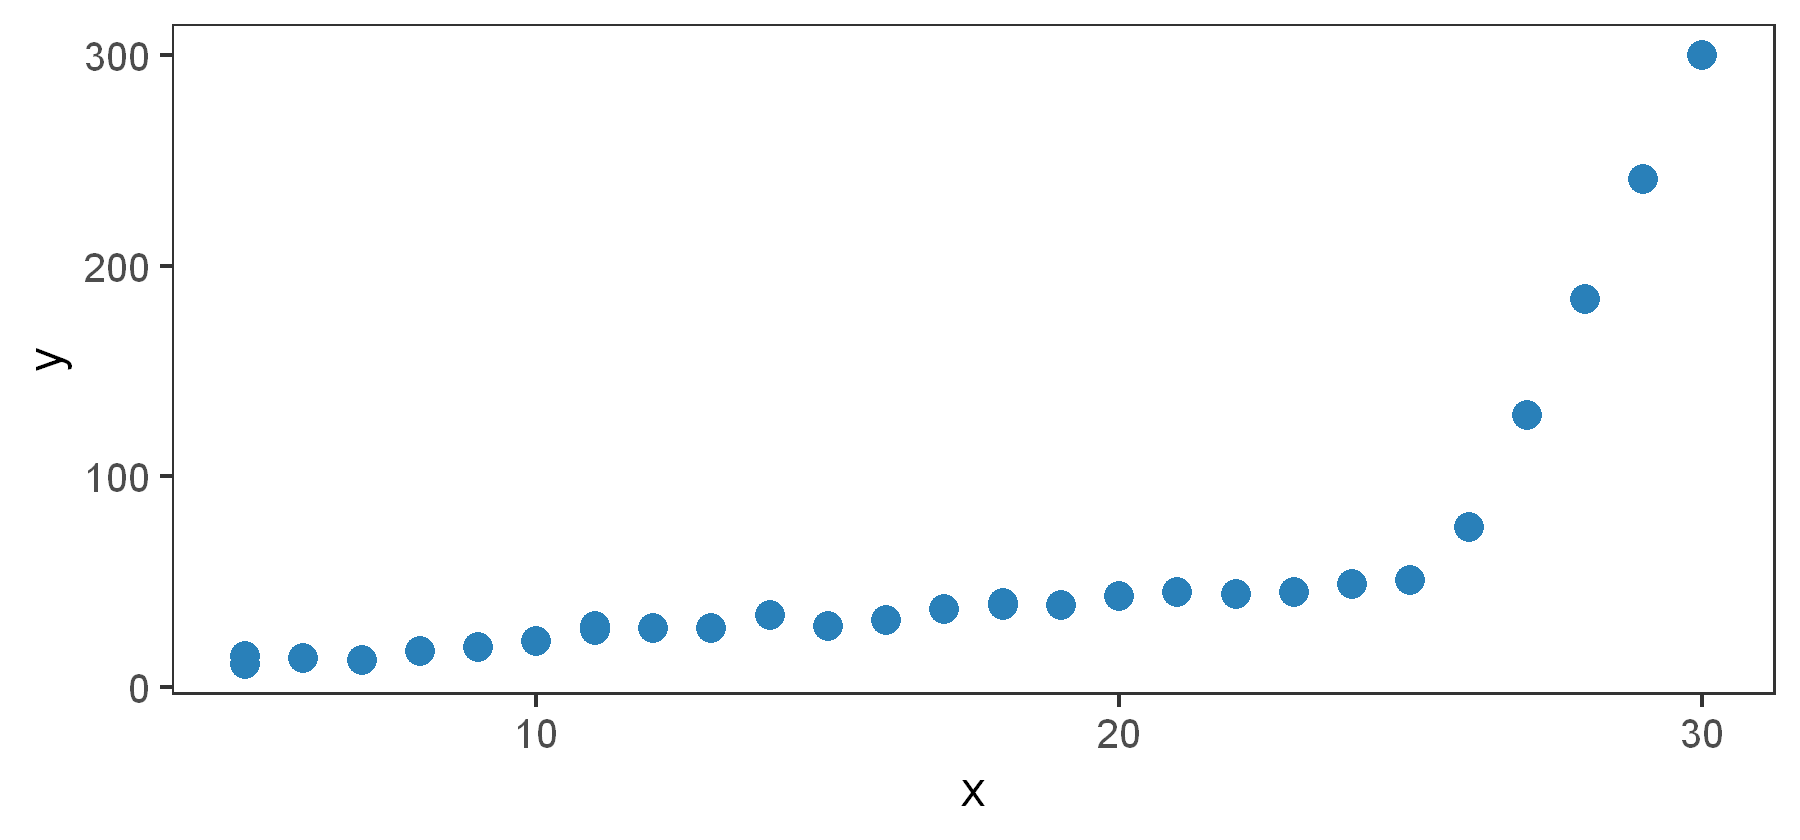

In [92]:
toy_data = read.csv("toy_data.csv",sep=';')

ggplot(toy_data,aes(x=x,y=y)) +
    geom_point(color='#2980B9',size=8) +
    theme_test(base_size=30)

En este caso, fuera del dominio utilizado anteriormete, la relación entre x e y es cuadrática, por lo que utilizar el modelo anterior traería un error enorme.

#### Evalúe el grado de la relación entre las variables y la calidad del modelo.

Cuando se habla del grado de relación entre las variables se habla que tan bueno es el ajuste, lo cual se puede observar utilizando el _**Coeficiente de Correlación**_.

$$ r_{xy} = \frac{S_{xy}}{\sqrt{S_{xx}\cdot S_{yy}}}$$

- Si $|r_{xy}| \sim 1$ se dice que el grado es bueno, es decir, que la variable $y$ se puede calcular en base a $x$ (y viceversa).
- Si $|r_{xy}| \sim 0$ se desprende que las variables $x$ e $y$ no están relacionadas linealmente.

Con este coeficiente también podemos ver si las variables son directamente o inversamente proposionales, esto viendo si es mayor o menos que cero respectivamente.

Para calcular el coeficiente de correlación se puede utilizar la función `cor(x,y)`.

In [93]:
cor(data$TonChurros,data$HH)

[1] 0.981232

Como $r_{xy}$ es aproximadamente 0.98, el ajuste realizado es bueno, por lo que cada variable se puede calcular a partir de la otra. Además, como es mayor que 0, estas variables son directamente proporcionales.

Ahora, la calidad del modelo, se puede medir utilizando el **Coeficiente de Determinación**, el cual determina que tanto del valor de la variable dependiente ($Y$) se determina a partir de la variable independiente ($X$).

$$ r^{2}_{xy} = \frac{\sum(\hat{y_i}-\bar{y})^2}{\sum(y_i - \bar{y})^2}$$

- $r^{2}_{xy} \sim 1$: Es mejor la predicción.
- $r^{2}_{xy} \sim 0$: Puede indicar la necesidad de aplicar alguna transformación a los datos.

El coeficiente de determinación es uno de los campos que entrega la función `summary` cuando se utiliza sobre el modelo.

In [104]:
model_summary$r.squared

[1] 0.9628162

Como el coeficiente de determinación es de 0.96, se puede decir que el 96% de la variación en las HH (Y) se puede atribuir a su relación lineal con las toneladas de churros (X).

#### Considerando la siguiente afirmación: "La cantidad de HH crece al doble respecto de las toneladas de churros".

De la afirmación se desprende que nos están preguntando por el valor de $\beta_1$. En particular hay que determinar si se puede decir con cierta certeza que este parámetro toma el valor de 3.

#### Verifique mediente un Intervalo de Confianza adecuado, considerando una certeza de 95%.

Hay que construir un Intervalo de Confianza para $\beta_1$. Este se construye considerando la desviación estándar de este parámetro y la distribución `t-student`, la cual es la distribución teórica para $\beta_1$.

$$\beta_{1}: \left\{\beta_{1} \pm t(1-\frac{\alpha}{2}, n-2) * \sqrt{V(\hat{\beta_{1}})}\right\}$$

Donde $t$ se obtiene desde la tabla t-student

<img src="img/t-student.png">

Para buscar en esta tabla hay que buscar el primer parámetro en las columnas y el segundo parámetro en las filas.

Afortunadamente estamos trabajando con R, por lo que podemos utilizar la función `confint(model)` para calcularlo directamente. Esta función por defecto considera una certeza de $0.95$. En caso de evaluar otro nivel de certeza, por ejemplo $0.97$, se debe utilizar el parámetro `level=0.97`.

In [106]:
confint(model)

,2.5 %,97.5 %
(Intercept),-2.986420,2.973124
TonChurros,1.986233,2.364252


Se obtiene que $\beta_1$ (TonChurros) se encuentra en el intervalo $[1.99,2.36]$ con un 95% de certeza. Por lo tanto, se puede considerar que $\beta_1$ es igual a 2, ya que se encuentra dentro del intervalo anterior, centrado en $\beta_1$m con una certeza de 95%/nivel de significancia de $0.05$.

#### Verifique mediante Dócimas de Hipótesis.

Las Dócimas de Hipótesis se utilizan para realizar inferencias con el objetivo de probar una hipótesis. En este caso, nuestra hipótesis es que $\beta_1$ toma el valor de 2, por lo que nuestras hipótesis serían las siguientes. El objetivo es encontrar que tan probable es que se cumpla la hipótesis $H_0$.

$$ H_0: \beta_1 = 2$$
$$ H_1: \beta_1 \neq 2 $$

En este tipo de técnicas se define un estadístico sobre la variable, el cual debe tener una distribución conocida, el cual se compara con una región crítica, la cual tiene valores improbables si se cumple la hipótesis $H_0$. Si el estadístico cae dentro de esta región crítica, al ser improbable esto si $H_0$ fuera verdadero, se rechaza esta hipótesis.

En el caso de $\beta_1$, el estadístico a utilizar es el siguiente.

$$t_{\beta_{1}} = \frac{\hat{\beta_{1}}-c}{\frac{S}{\sqrt[]{S_{xx}}}}$$

El cual se compara con la siguiente región crítica.

$$R_{\alpha} = \big\{|t_{\beta_{1}| >  t_{(1-\frac{\alpha}{2}, n-2)}}\big\}$$ 

Si se cumple dicha condición, se rechaza $H_0$.

En el [formulario](https://aula.usm.cl/pluginfile.php/6961025/mod_resource/content/0/Form%2BTablas.pdf) se encuentran las distintas Dócimas de Hipótesis que se utilizan en el curso.


Teniendo esto en cuenta, se procede a calcular el estadístico. Todos los elementos para calcularlo se encuentran en el resumen del modelo lineal. En particular, el denominador del estadístico corresponde a la desviación estándar del parámetro.

In [107]:
model_coeffs <- model_summary$coefficients
beta_1 <- model_coeffs['TonChurros','Estimate'] # Valor de Beta 1
std_error <- model_coeffs['TonChurros','Std. Error'] # Desviación Std
t_value <- (beta_1 - 2.0)/std_error
abs(t_value)

[1] 1.922816

Con el estadístico calculado, procedemos a calcular la región crítica utilizando la tabla `t-student`. En este caso consideramos $\alpha=0.05$, así que $\frac{\alpha}{2} = 0.025$, por lo que $t_{(1 - 0.025,22)} = 2.0739$.

Como el valor absoluto del estadístico (1.92) no es mayor que $2.0739$, se acepta la hipótesis $H_0$ con un 95% de certeza.

#### Construya un intervalo de confianza para la respuesta de HH dado 15 toneladas de churros.

Cuando se pregunta por una cierta cantidad de la variable dependiente dado un valor para la variable independiente existen dos opciones:

- IC para la respuesta media de Y: $\mu_{Y}|X=x_0$
- IC para la respuesta de Y: $Y|X=x_0$

En este caso preguntan por la respuesta de HH, por lo que se trata del segundo caso, cuyo intervalo de confianza se construye de la siguiente manera.

 $\Big\{y_{0} \pm t(1-\frac{\alpha}{2}, n-2) * \hat{\sigma}\,\sqrt[]{1 + \frac{1}{n}+\frac{(x_{0}-\bar{x})^2}{Sxx}}\Big\}$
 
Esto lo podemos calcular utilizando nuevamente la función `predict`, ahora agregando el parámetro `interval`. Esta función por defecto considera un nivel de significancia de $0.05$.

In [108]:
predict(model,newdata=data.frame(TonChurros=15),interval='prediction')
#En caso de querer un IC para la respuesta media, se utiliza interval = 'confidence'

,fit,lwr,upr
1,32.62199,26.8665,38.37747


La respuesta de HH dado 15 toneladas de churros se encuentra el intervalo $[26.8665,38.37747]$, centrado en $32.62199$, con un 95% de certeza.

In [109]:
predict(model,newdata=data.frame(TonChurros=15),interval='confidence')

,fit,lwr,upr
1,32.62199,31.46776,33.77621


#### Verifique si el modelo es lineal.

Para verificar si existe relación lineal entre las variables se puede utilizar el test de _**ANOVA**_. En este test se compara el conjunto $Y$ con $\hat{Y}$. El test considera las siguientes hipótesis:

- $H_0: \beta_1 = 0$, es decir, no existe la relación lineal con Y.
- $H_1: \beta_1 \neq = 0$, es decir, existe relación lineal.

Este test funciona de similar manera las Dócimas de Hipótesis, donde se rechaza $H_0$ si $R_{\alpha} = f > F_{(1 - \alpha, 1, n-2)}$.

<img src='img/anova.png'>

El estadístico se compara con la distribución F
<img src='img/fisher.png'>

Esta tabla considera un nivel de significancia de 0.05. Como el segundo parámetro es 1, debemos utilizar la primera columna.

En R, se puede aplicar este test con la función `aov(model)`.

In [110]:
fm = aov(model)
summary(fm)

            Df Sum Sq Mean Sq F value Pr(>F)    
TonChurros   1   4211    4211   569.7 <2e-16 ***
Residuals   22    163       7                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

El cual entrega un estadístico de $569.7$. Luego, buscamos nuestro valor para  $F_{(1 - 0.05, 1, 24 -2)}$ en la tabla, el cual es $4.30$. Como $569.7 > 4.30$ se rechaza $H_0$, por lo que se concluye que _**con un nivel de significancia de 0.05 no hay suficiente evidencia para decir que el modelo NO es lineal**_.

#### Verifique si los errores son independientes.

Para verificar si los errores son independientes se utiliza el test de _**Durbin-Watson**_, el cual tiene dos hipótesis.
- $H_0: \rho = 0$, es decir, no hay correlación
- $H_1: \rho > 0$

Cuyo estadístico se define como
$ D = \frac{\sum_{i=2}(e_i - e_{i-1})^2}{\sum_{i=1}e_i^2}$

<img src='img/durbin-watson.png'>

- Si $D > d_U$: Se acepta H_0, por lo que los errores no están correlacionados.
- Si $D < d_l$: Se rechaza H_0, por lo que existe correlación entre los errores.
- Si $d_L \geq D \geq D_U$: El test no concluye nada.

Con el método `dwtest(model)` se puede aplicar este test al modelo construido.

In [111]:
dwtest(model)


	Durbin-Watson test

data:  model
DW = 2.4346, p-value = 0.8615
alternative hypothesis: true autocorrelation is greater than 0


Utilizando los valores de la tabla, tenemos que $d_L = 1.13$ y $d_U = 1.34$. Como $D = 2.4345 > d_U = 1.34$ se acepta $H_0$. Con un nivel de significancia de 0.05 se acepta $H_0$, por lo que con un 95% de certeza los errores no están correlacionados.

#### Verifique si los errores siguen una distribución normal.

Para verificar si los errores siguen una distribución normal se puede utilizar el test de _**Kolmogorov-Smirnov**_. Este test compara dos distribuciones, en este caso se compararán los errores con una distribución normal.

Sus hipótesis son:
- $H_0: F_0(x) = F_n(x)$ de una $N(\mu,\sigma)$
- $H_1: F_0(x) \neq F_n(x)$ de una $N(\mu,\sigma)$

Pasos:
- Se calculan y ordenan los residuos.
- Se arma la frecuencia acumulada $F_0$.
- Se estandarizan los residuos para obtener un z.
- De la tabla de distribución normal se obtiene la frecuencia acumulada  $F_n$ para cada Z.
- Se resta cada $F_n - F_0$.

El estadístico corresponde al valor absoluto de la diferencia más grande entre $F_n$ y $F_0$.

Donde $H_0$ se rechaza si $D > D^{\alpha}_n$.

<img src='img/kolmo.png'>

Parece mucho trabajo, pero afortunadamente la función `ksnormTest(residuals)` realiza todos estos pasos por nosotros.

In [112]:
ksnormTest(fm$residuals) # los residuos se obtienen desde el test de ANOVA


Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.237
  P VALUE:
    Alternative Two-Sided: 0.1139 
    Alternative      Less: 0.1202 
    Alternative   Greater: 0.05695 

Description:
 Thu Jul 09 15:18:13 2020 by user: felip


Buscando en la tabla tenemos que $D^{0.05}_{24}$ es $0.36931$. Como nuestro estadístico $D = 0.237$ y D no es mayor que $D^{0.05}_{24}$, por lo que se acepta $H_0$. Con un nivel de significancia de 0.05, se concluye que los residuos siguen una distribución normal. 